# CISC 452 Assignment 3 - Unsupervised Learning (100 points)  

Please put your name and student id

    FirstName LastName, #12345678

- The notebook file has clearly marked blocks where you are expected to write code. Do not write or modify any code outside of these blocks.
- Do not add or delete cells from the notebook.
- Run all cells, and do not clear out the outputs, before submitting. You will only get credit for code that has been run.
- Make sure to run all the cells from beginning before the submission
- Mark will be deducted based on late policy (-10% per day after due date until the end date after which no assignments will be accepted)

In [16]:
#Donghao Wang 20119632

## [Part 1 Simple Competitive Learning (50 points)](#Part-1-Simple-Competitive-Learning)  

Build a **Kohonen Network** and use **Maxnet** at the output layer to find the node with the highest activation.  

### Build Model (30 points)  
Kohonen Network (20 points)  
Maxnet (10 points)  

### Evaluate Model (20 points)  
Use the Kohonen Network to predict the lables with the train and test datasets (10 points)  
Evaluate the prediction results (10 points)  
- Evaluation matrics include confusion matrix and accuracy

## [Part 2 Principle Component Analysis (50 points)](#Part-2-Principle-Component-Analysis)

Implement a **PCA Network** (not PCA) to reduce the dimension of the Iris dataset from 4 to 3.  
Use the Kohonen Network in Part 1 to train and test on the new dataset.  

### Build Model (30 points)  
Build PCA Network (20 points)  
Train the PCA model and obtain the new datasets with reduced dimension (10 points)  

### Evaluate Model (20 points)  
Use the Kohonen Network to predict the lables with the new train and test datasets (10 points)  
Evaluate the prediction results (10 points)  
- Evaluation matrics include confusion matrix and accuracy

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [18]:
data = load_iris()
x = data.data
x = (x - x.mean(axis=0)) / x.std(axis=0)
y = data.target
data.feature_names, data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [20]:
def evaluator(y_test, y_pred):
    ####################################################################################################
    # enter code here to implement the evaluation matrices including confusion matrix and accuracy
    # You can only use Numpy here
    cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9=0,0,0,0,0,0,0,0,0
    for yt,yp in zip(y_test,y_pred):
        if yt==0 and yp==0 :
            cell1+=1
        if yt==0 and yp==1:
            cell2+=1
        if yt==0 and yp==2:
            cell3+=1
        if yt==1 and yp==0 :
            cell4+=1
        if yt==1 and yp==1:
            cell5+=1
        if yt==1 and yp==2:
            cell6+=1
        if yt==2 and yp==0 :
            cell7+=1
        if yt==2 and yp==1:
            cell8+=1
        if yt==2 and yp==2:
            cell9+=1
    confusion_matrix=np.array(([cell1,cell2,cell3],[cell4,cell5,cell6],[cell7,cell8,cell9]))
    sum=cell1+cell2+cell3+cell4+cell5+cell6+cell7+cell8+cell9
    Class_0_accuracy=(cell1+cell5+cell6+cell8+cell9)/sum
    Class_1_accuracy=(cell5+cell1+cell7+cell3+cell9)/sum
    Class_2_accuracy=(cell9+cell1+cell2+cell4+cell5)/sum
    print('The confusion matrix is:')
    print(confusion_matrix)
    print('Class 0 accuracy:'+str(Class_0_accuracy))
    print('Class 1 accuracy:'+str(Class_1_accuracy))
    print('Class 2 accuracy:'+str(Class_2_accuracy))
    return 0

    ####################################################################################################

In [35]:
# build a baseline model with K-Means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3) #n_clusters - the number of clusters
km.fit(x_train)
y_pred = km.predict(x_train)
evaluator(y_train, y_pred)
y_pred = km.predict(x_test)
evaluator(y_test, y_pred)
# there are often times that the confusion matrix of this model doesn't show correctly
#should be labeling the cluser wrong in some special cases, 
#like the centroid of 0 in this case turns out to be centroid of 1 in the actual value

The confusion matrix is:
[[40  0  0]
 [ 0 32  8]
 [ 0 14 26]]
Class 0 accuracy:1.0
Class 1 accuracy:0.8166666666666667
Class 2 accuracy:0.8166666666666667
The confusion matrix is:
[[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]
Class 0 accuracy:1.0
Class 1 accuracy:0.8
Class 2 accuracy:0.8


0

## Part 1 Simple Competitive Learning

In [22]:
####################################################################################################
# enter code here to build the Kohonen Network with Maxnet
class Kohonen(object):
    def __init__(self,initial,iteration):
        self.initial=initial #centroids and their coordinate, shape(3,4)
        self.iteration=iteration #integer
        self.history=[]
    def euclidean(self,item1,item2): #first layer to hidden layer activation function
        sum=0
        for i in zip(item1,item2):
          sum+=np.square(i[0]-i[1])
        return np.sqrt(sum)
    #train the initial weights
    def train(self , x,y, learning_rate=0.5):
        num_elements=x.shape[0]
        for j in range(self.iteration):
          #loop over all the elements in x
          d_w=[0.1 for i in range(x.shape[1])]
          for i in range(num_elements):
            #adjustment to the learning rate
            minimal_distance =10000
            for k in range(len(self.initial)):# get the winning node in maxnet
              distance = self.euclidean(self.initial[k],x[i])#first layer calculation
              if distance < minimal_distance:
                minimal_distance = distance
                winning_node_index = k
            winning_node = self.initial[winning_node_index]
            #update weight change
            for a in range(len(d_w)):
              d_w[a] = learning_rate * (x[i][a] - winning_node[a]) 
               

            # update weights
            self.initial[winning_node_index] = np.add(winning_node, d_w)
          print("Iteration done:"+str(j+1))
          print("Centroids: "+str(self.initial))
          acc = (self.predict(x) == y).sum()/num_elements
          self.history.append(acc)
          print("Accuracy:"+str(acc))
        return self.initial
    def predict(self,x):
        elements_num=x.shape[0]
        y_pred=np.zeros(x.shape[0])
        for i in range(elements_num):
          minimal_distance=10000
          for k in range(len(self.initial)):# get the winning node in maxnet
            distance = self.euclidean(self.initial[k],x[i])#first layer calculation
            if distance < minimal_distance:
              minimal_distance = distance
              winning_node_index = k
              y_pred[i]=k 
        return y_pred
    


####################################################################################################

In [23]:
####################################################################################################
# enter code here to train and test the Kohonen Network
input=[[-1, -0, -1,-1 ],
    [0, 0, 0, 0],
    [0, 0, 1, 2]]
model=Kohonen(input,10)
model.train(x,y)

####################################################################################################

Iteration done:1
Centroids: [array([-0.99377882,  0.82708883, -1.3139642 , -1.30273419]), array([ 0.21277024, -0.52016821,  0.7508418 ,  0.83154969]), array([0.684312  , 0.39488866, 0.9094604 , 1.36632955])]
Accuracy:0.82
Iteration done:2
Centroids: [array([-0.99377882,  0.82708883, -1.3139642 , -1.30273419]), array([ 0.2127703 , -0.5201684 ,  0.75084178,  0.83154966]), array([0.684312  , 0.39488866, 0.9094604 , 1.36632955])]
Accuracy:0.82
Iteration done:3
Centroids: [array([-0.99377882,  0.82708883, -1.3139642 , -1.30273419]), array([ 0.2127703 , -0.5201684 ,  0.75084178,  0.83154966]), array([0.684312  , 0.39488866, 0.9094604 , 1.36632955])]
Accuracy:0.82
Iteration done:4
Centroids: [array([-0.99377882,  0.82708883, -1.3139642 , -1.30273419]), array([ 0.2127703 , -0.5201684 ,  0.75084178,  0.83154966]), array([0.684312  , 0.39488866, 0.9094604 , 1.36632955])]
Accuracy:0.82
Iteration done:5
Centroids: [array([-0.99377882,  0.82708883, -1.3139642 , -1.30273419]), array([ 0.2127703 , -0

[array([-0.99377882,  0.82708883, -1.3139642 , -1.30273419]),
 array([ 0.2127703 , -0.5201684 ,  0.75084178,  0.83154966]),
 array([0.684312  , 0.39488866, 0.9094604 , 1.36632955])]

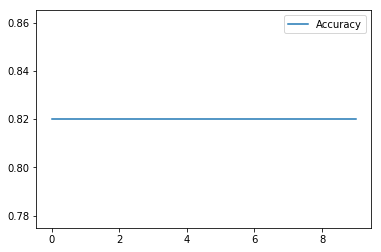

In [24]:
plt.plot(model.history, label='Accuracy')
plt.legend()
plt.show()

In [25]:
evaluator(model.predict(x),y)

The confusion matrix is:
[[50  0  0]
 [ 0 44 21]
 [ 0  6 29]]
Class 0 accuracy:1.0
Class 1 accuracy:0.82
Class 2 accuracy:0.82


0

## Part 2 Principle Component Analysis

In [26]:
####################################################################################################
# enter code here to build the PCA model
class PCA(object):
    def __init__(self,iteration):
      #initialize with some random value
      self.w=np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]])
      self.iteration=iteration
    def train(self,x,learning_rate=0.0001):
      #normalization
      mean_value=np.mean(x,axis=0)
      normalized_data=x-mean_value
      for iter in range(self.iteration):
        for n in range(normalized_data.shape[0]):
          #initialize y
          y=[0 for h in range(3)]
          #calculate output
          for j in range(3):
            residual=0
            y[j]=np.dot(normalized_data[n],self.w[j])
            for k in range(j):
              residual+=sum(np.dot(y[j],self.w[k]))
            #update weights according to output
            for i in range(len(self.w[0])):
              self.w[j][i] += learning_rate*y[j]*(normalized_data[n][i]-residual)
      return 0
    #trim the data
    def predict(self,x):
      sum_weights=self.w.sum(axis=0)
      max=0
      column_to_be_cut=0
      for i in range(len(sum_weights)):
        if sum_weights[i]>max:
          max=sum_weights[i]
          column_to_be_cut=i
      edited_array=x.copy()
      edited_array=np.delete(edited_array,2,1)
      print("Cut off column:",column_to_be_cut)
      return edited_array

####################################################################################################

In [27]:
####################################################################################################
# enter code here to train the PCA model and obtain the new train and test datasets
pca=PCA(50)
pca.train(x)
#gengerate new dataset
x_3=pca.predict(x)
print('Final weight is:\n', pca.w)
####################################################################################################

Cut off column: 2
Final weight is:
 [[ 1.81353731 -0.1716915   1.86288738  1.83878364]
 [-0.12612594 -0.716678   -0.07809588 -0.09101658]
 [-0.03187053 -0.52213269  0.00753344 -0.00308994]]


In [28]:
####################################################################################################
# enter code here to train and test the Kohonen Network with the new datasets
input=[[-1, -1, -1 ],
    [1, 0, 0],
    [0, 1, 2]]
model1=Kohonen(input,10)
model1.train(x_3,y)

####################################################################################################

Iteration done:1
Centroids: [array([-0.99377882,  0.82708883, -1.30273419]), array([ 0.21278516, -0.52014781,  0.83157728]), array([0.68431226, 0.39488875, 1.36632944])]
Accuracy:0.8133333333333334
Iteration done:2
Centroids: [array([-0.99377882,  0.82708883, -1.30273419]), array([ 0.21278519, -0.52014791,  0.83157726]), array([0.68431226, 0.39488875, 1.36632944])]
Accuracy:0.8133333333333334
Iteration done:3
Centroids: [array([-0.99377882,  0.82708883, -1.30273419]), array([ 0.21278519, -0.52014791,  0.83157726]), array([0.68431226, 0.39488875, 1.36632944])]
Accuracy:0.8133333333333334
Iteration done:4
Centroids: [array([-0.99377882,  0.82708883, -1.30273419]), array([ 0.21278519, -0.52014791,  0.83157726]), array([0.68431226, 0.39488875, 1.36632944])]
Accuracy:0.8133333333333334
Iteration done:5
Centroids: [array([-0.99377882,  0.82708883, -1.30273419]), array([ 0.21278519, -0.52014791,  0.83157726]), array([0.68431226, 0.39488875, 1.36632944])]
Accuracy:0.8133333333333334
Iteration 

[array([-0.99377882,  0.82708883, -1.30273419]),
 array([ 0.21278519, -0.52014791,  0.83157726]),
 array([0.68431226, 0.39488875, 1.36632944])]

In [29]:
#with PCA
evaluator(model1.predict(x_3),y)

The confusion matrix is:
[[50  0  0]
 [ 0 43 21]
 [ 0  7 29]]
Class 0 accuracy:1.0
Class 1 accuracy:0.8133333333333334
Class 2 accuracy:0.8133333333333334


0